Description

Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

Problem Statement: 

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

Domain: Amazon reviews for a leading phone brand

Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Natural Language Processing\Notebook\Capstone Project Topic Analysis of Review Data\K8 Reviews v0.2.csv'
data = pd.read_csv(data_path)
# Display the first few rows of the data
print(data.head())

   sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...


In [2]:
#Perform an EDA on the dataset.
# Get the summary statistics of the train data
print(data.describe())

          sentiment
count  14675.000000
mean       0.474480
std        0.499365
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [3]:
# Check for missing values in the  data
print(data.isnull().sum())

sentiment    0
review       0
dtype: int64


In [4]:
# Select columns containing categorical data
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns in the DataFrame:")
for column in categorical_columns:
    print(column)


Categorical columns in the DataFrame:
review


In [5]:
# Not Check for infinity, does not have numeric columns so not checking for outliers, corellation an
import numpy as np
# Check for NaN
if data.isnull().values.any():
    print("DataFrame contains NaN values. . REmoving them")
    data.dropna(inplace=True)  # drop NaN values

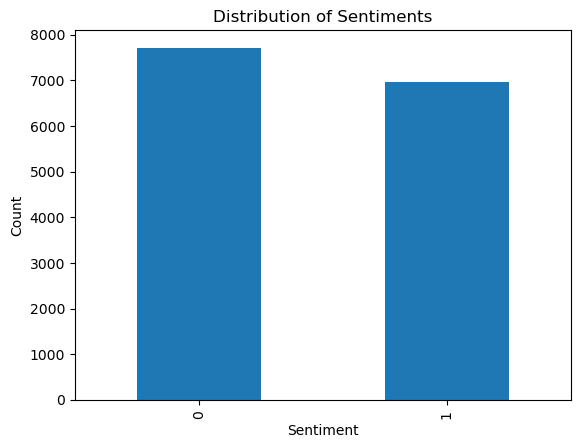

In [6]:
# Plot the distribution of sentiments
data['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
data['sentiment'].value_counts()

sentiment
0    7712
1    6963
Name: count, dtype: int64

In [8]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Normalize casings for the review text 
data['review'] = data['review'].str.lower().tolist()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naseh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\naseh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
# Download the stopwords from NLTK
nltk.download('stopwords')
# Get the list of stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
# Remove stopwords and punctuation from each review
data['review'] = data['review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words and word not in punctuation])
# Print the first few rows of the modified data
print(data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naseh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   sentiment                                             review
0          1                [good, need, updates, improvements]
1          0  [worst, mobile, bought, ever, battery, drainin...
2          1  [get, 10, cash, back, ...., already, 15, janua...
3          1                                             [good]
4          0  [worst, phone, everthey, changed, last, phone,...


In [10]:
import nltk
# Apply pos_tag to each word in the review text
data['pos_tags'] = data['review'].apply(nltk.pos_tag)
data.head()

,sentiment,review,pos_tags
0,1,"[good, need, updates, improvements]","[(good, JJ), (need, NN), (updates, NNS), (impr..."
1,0,"[worst, mobile, bought, ever, battery, drainin...","[(worst, RB), (mobile, NN), (bought, VBD), (ev..."
2,1,"[get, 10, cash, back, ...., already, 15, janua...","[(get, VB), (10, CD), (cash, NN), (back, RB), ..."
3,1,[good],"[(good, JJ)]"
4,0,"[worst, phone, everthey, changed, last, phone,...","[(worst, RB), (phone, NN), (everthey, NN), (ch..."


As we see, going forward it would be digfficult to manage it in this format. So flattening pos_tag.
For the topic model, we should  want to include only nouns.
Find out all the POS tags that correspond to noun. 
Limit the data to only terms with these tags.

In [11]:
# Explode the lists in the pos_tags column
df = data.explode('pos_tags')
# Convert the pos_tags column to a list
NN = df['pos_tags'].tolist()
# Print the list
print(NN[:10])

[('good', 'JJ'), ('need', 'NN'), ('updates', 'NNS'), ('improvements', 'NNS'), ('worst', 'RB'), ('mobile', 'NN'), ('bought', 'VBD'), ('ever', 'RB'), ('battery', 'RB'), ('draining', 'VBG')]


#Create a topic model using LDA on the cleaned-up data with 12 topics.
Print out the top terms for each topic.
What is the coherence of the model with the c_v metric?

In [12]:
# Import the gensim modules
import gensim
import gensim.corpora as corpora

# Create a dictionary object from the document-word matrix
dictionary = corpora.Dictionary(data['review'])

# Create a corpus object from the document-word matrix
corpus = [dictionary.doc2bow(text) for text in data['review']]

# Create an LDA model object with 12 topics
lda_model = gensim.models.LdaModel(corpus, num_topics=12, id2word=dictionary, random_state=0)

# Print the top terms for each topic
for i in range(12):
    print(f"Topic {i}:")
    print(lda_model.print_topic(i, 10))
    print()

Topic 0:
0.175*"good" + 0.062*"phone" + 0.031*"camera" + 0.020*"mobile" + 0.018*".." + 0.018*"battery" + 0.014*"quality" + 0.014*"'s" + 0.013*"price" + 0.012*"working"

Topic 1:
0.080*"product" + 0.069*"good" + 0.029*"..." + 0.027*"phone" + 0.026*"worth" + 0.024*"superb" + 0.023*"delivery" + 0.021*"price" + 0.018*"mobile" + 0.017*"h"

Topic 2:
0.080*"battery" + 0.042*"poor" + 0.029*"camera" + 0.028*"phone" + 0.025*"'s" + 0.022*"backup" + 0.020*"good" + 0.018*"performance" + 0.018*"heating" + 0.016*"excellent"

Topic 3:
0.037*"phone" + 0.029*"lenovo" + 0.023*"n't" + 0.016*"buy" + 0.013*"service" + 0.011*"even" + 0.011*"time" + 0.010*"'s" + 0.010*"note" + 0.010*"days"

Topic 4:
0.055*"phone" + 0.030*"hai" + 0.019*"awesome" + 0.017*"network" + 0.016*"sim" + 0.015*"heated" + 0.015*"ho" + 0.013*"gets" + 0.012*"4g" + 0.012*"mobile"

Topic 5:
0.099*"note" + 0.090*"k8" + 0.079*"lenovo" + 0.017*"mobile" + 0.015*"happy" + 0.015*"dolby" + 0.014*"k4" + 0.012*"good" + 0.011*"satisfied" + 0.010*"pro

In [13]:
# Import the CoherenceModel class
from gensim.models import CoherenceModel

# Create a CoherenceModel object for c_v coherence measure
c_v = CoherenceModel(model=lda_model, texts=data['review'], dictionary=dictionary, coherence='c_v')

# Calculate the c_v coherence score
c_v_coherence = c_v.get_coherence()
print(c_v_coherence)

# Get the coherence score
#coherence_score = coherence_model.get_coherence()

# Print the coherence score
print(f"Coherence score: {c_v_coherence:.4f}")

0.48796885378461313
Coherence score: 0.4880


The c_v metric is one of the coherence measures that can be used to evaluate the quality of a topic model. Coherence measures the relative distance between words within a topic, based on their co-occurrence in a corpus of texts. A higher coherence score means that the words in a topic are more semantically related and consistent.

The c_v metric is based on a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity. This coherence measure retrieves co-occurrence counts for the given words using a sliding window and the window size 110. The counts are used to calculate the NPMI of every top word to every other top word, thus, resulting in a set of vectors—one for every top word. The one-set segmentation of the top words leads to the calculation of the similarity between every top word vector and the sum of all top word vectors. As similarity measure the cosine is used. The coherence is the arithmetic mean of these similarities1

The c_v metric typically ranges from 0 to 1, where 0 means no coherence and 1 means perfect coherence. However, it is rare to see a coherence of 1 or close to 1 unless the words being measured are either identical words or bigra
0.3 is bad
0.4 is low
0.55 is okay
0.65 might be as good as it is going to get
0.7 is nice
0.8 is unlikely
0.9 is probably wrongms. 

In [14]:
# Import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)


In [15]:
# Calculate the perplexity score
perplexity = lda_model.log_perplexity(corpus)
print(perplexity)

# Print the perplexity score
print(f"Perplexity score: {perplexity:.4f}")


-8.507418280434889
Perplexity score: -8.5074


Another method is to use the perplexity score, which measures how well the model fits the data. A lower perplexity score means a better fit. You can compare the perplexity scores of different models with different numbers of topics and choose the one that has the lowest score. You can also use the log_perplexity method of your model to calculate the perplexity score. Here is an example of how to do that:

Create a topic model using LDA with what you think is the optimal number of topics
What is the coherence of the model?

In [17]:
# Define the range of number of topics to try
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Define the list of coherence and perplexity scores
coherence_scores = []
perplexity_scores = []

# Loop over the number of topics
for k in topics_range:
    # Build LDA model with k topics
    lda_model_k = gensim.models.LdaModel(corpus=corpus, num_topics=k, id2word=dictionary, random_state=0)
    # Compute c_v coherence score
    coherence_model_k = CoherenceModel(model=lda_model_k, texts=data['review'], dictionary=dictionary, coherence='c_v')
    coherence_k = coherence_model_k.get_coherence()
    # Compute perplexity score
    perplexity_k = lda_model_k.log_perplexity(corpus)
    # Append the scores to the lists
    coherence_scores.append(coherence_k)
    perplexity_scores.append(perplexity_k)
    # Print the scores
    print(f"Number of topics: {k}")
    print(f"Coherence score: {coherence_k:.4f}")
    print(f"Perplexity score: {perplexity_k:.4f}")
    print()

Number of topics: 2
Coherence score: 0.5142
Perplexity score: -7.3390

Number of topics: 3
Coherence score: 0.5340
Perplexity score: -7.4049

Number of topics: 4
Coherence score: 0.5338
Perplexity score: -7.4354

Number of topics: 5
Coherence score: 0.5131
Perplexity score: -7.4892

Number of topics: 6
Coherence score: 0.5185
Perplexity score: -7.5557

Number of topics: 7
Coherence score: 0.5247
Perplexity score: -7.6531

Number of topics: 8
Coherence score: 0.5370
Perplexity score: -7.7840

Number of topics: 9
Coherence score: 0.5190
Perplexity score: -7.9453



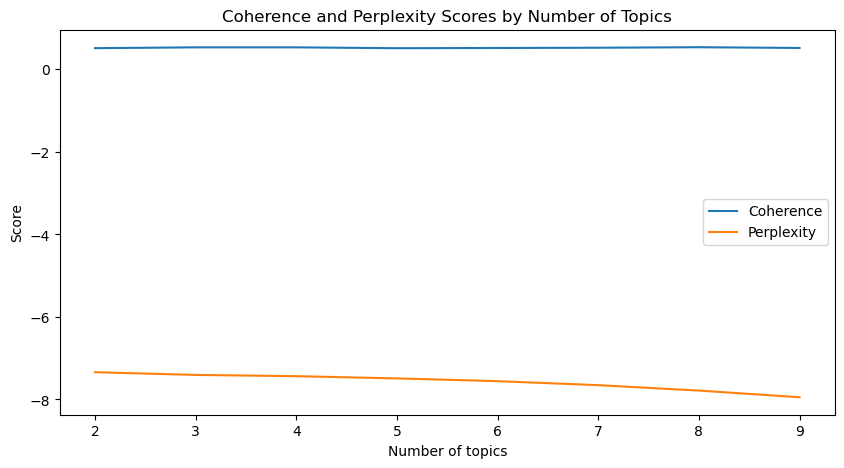

In [18]:
# Plot the scores
plt.figure(figsize=(10,5))
plt.plot(topics_range, coherence_scores, label='Coherence')
plt.plot(topics_range, perplexity_scores, label='Perplexity')
plt.xlabel('Number of topics')
plt.ylabel('Score')
plt.legend()
plt.title('Coherence and Perplexity Scores by Number of Topics')
plt.show()

In [19]:
# Find the optimal number of topics based on coherence score
optimal_k = topics_range[coherence_scores.index(max(coherence_scores))]
print(f"The optimal number of topics based on coherence score is {optimal_k}")

# Build the optimal LDA model
optimal_lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=optimal_k, id2word=dictionary, random_state=0)

The optimal number of topics based on coherence score is 8


In [20]:
# Print the coherence score of the optimal model
optimal_coherence_model = CoherenceModel(model=optimal_lda_model, texts=data['review'], dictionary=dictionary, coherence='c_v')
optimal_coherence = optimal_coherence_model.get_coherence()
print(f"The coherence score of the optimal model is {optimal_coherence:.4f}")


The coherence score of the optimal model is 0.5370


In [23]:
# Import pandas
import pandas as pd

# Get the top 10 terms for each topic
topics = optimal_lda_model.print_topics(num_words=10)
topics

[(0,
  '0.088*"good" + 0.041*"phone" + 0.023*"camera" + 0.018*"battery" + 0.013*"working" + 0.011*"mobile" + 0.011*"quality" + 0.011*"heating" + 0.010*"charger" + 0.010*"one"'),
 (1,
  '0.069*"good" + 0.055*"..." + 0.046*"phone" + 0.038*"product" + 0.032*"best" + 0.023*"price" + 0.021*"mobile" + 0.019*"camera" + 0.016*"...." + 0.016*"excellent"'),
 (2,
  '0.057*"battery" + 0.049*"camera" + 0.033*"phone" + 0.023*"poor" + 0.023*"good" + 0.018*"\'s" + 0.017*"awesome" + 0.014*"quality" + 0.014*"backup" + 0.012*"performance"'),
 (3,
  '0.031*"phone" + 0.029*"lenovo" + 0.017*"n\'t" + 0.013*"note" + 0.012*"\'s" + 0.011*"buy" + 0.011*"product" + 0.011*"amazon" + 0.010*"working" + 0.010*"k8"'),
 (4,
  '0.042*"phone" + 0.027*"buy" + 0.024*"n\'t" + 0.021*"worst" + 0.019*"mobile" + 0.016*"waste" + 0.014*"hai" + 0.014*"bad" + 0.013*"h" + 0.011*"lenovo"'),
 (5,
  '0.041*"note" + 0.039*"k8" + 0.028*"lenovo" + 0.023*"problem" + 0.018*"mobile" + 0.017*"network" + 0.015*"sim" + 0.011*"n\'t" + 0.011*"hea

In [24]:
# Import pandas
import pandas as pd

# Get the top 10 terms for each topic
topics = optimal_lda_model.print_topics(num_words=10)

# Create a dataframe with the topics and the terms
df = pd.DataFrame(topics, columns=['Topic', 'Terms'])

# Get the most frequent word in each topic
df['Topic Name'] = df['Terms'].apply(lambda x: x.split('+')[0].split('*')[1].strip('"'))

# Print the dataframe
print(df)


   Topic                                              Terms Topic Name
0      0  0.088*"good" + 0.041*"phone" + 0.023*"camera" ...     good" 
1      1  0.069*"good" + 0.055*"..." + 0.046*"phone" + 0...     good" 
2      2  0.057*"battery" + 0.049*"camera" + 0.033*"phon...  battery" 
3      3  0.031*"phone" + 0.029*"lenovo" + 0.017*"n't" +...    phone" 
4      4  0.042*"phone" + 0.027*"buy" + 0.024*"n't" + 0....    phone" 
5      5  0.041*"note" + 0.039*"k8" + 0.028*"lenovo" + 0...     note" 
6      6  0.067*"nice" + 0.059*".." + 0.042*"phone" + 0....     nice" 
7      7  0.043*"phone" + 0.013*"n't" + 0.011*"screen" +...    phone" 
